# Road Accident Severity in India

## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Reading

In [2]:
data = pd.read_csv('./Road.csv')

In [3]:
data.head(7)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury


In [4]:
data.tail(7)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12309,9:05:00,Friday,31-50,Female,Elementary school,Employee,5-10yr,Pick up upto 10Q,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
12310,9:05:00,Friday,18-30,Male,NaN,Employee,NaN,Special vehicle,Owner,Above 10yr,...,Reversing,Passenger,Male,Over 51,3,Employee,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [5]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [6]:
data.shape

(12316, 32)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,2889.0,2.011076,0.635308,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,2889.0,1.529249,0.993012,1.0,1.0,1.0,2.0,8.0


## EDA

## Univariate Analysis

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\3972761114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_week',data=data,palette='Set2')


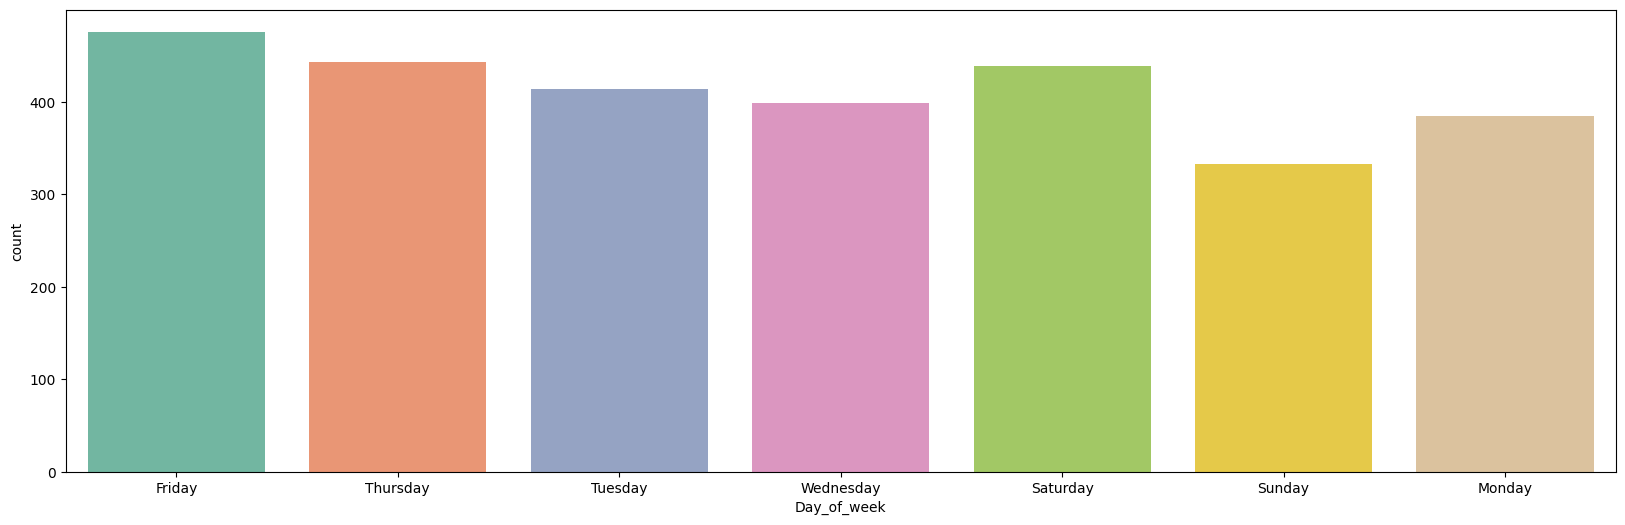

In [13]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Day_of_week',data=data,palette='Set2')
plt.show()

In [14]:
## Above graph shows that accidents do not seems to have any relation with days of week

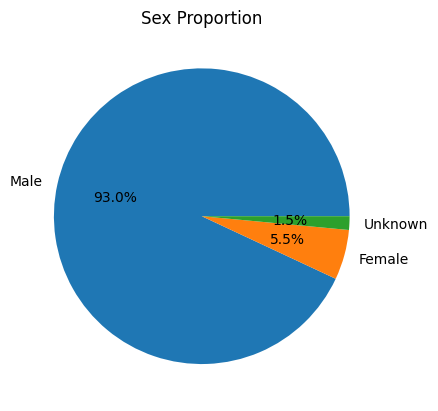

In [15]:
plt.subplot(1,1,1)
plt.title("Sex Proportion")
plt.pie(data.Sex_of_driver.value_counts(),autopct="%1.1f%%", labels=data.Sex_of_driver.value_counts().index)
plt.show()

In [16]:
## We can see accidents of males occured more as compared to females

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\3435719498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_band_of_driver',data=data,palette='Set2')


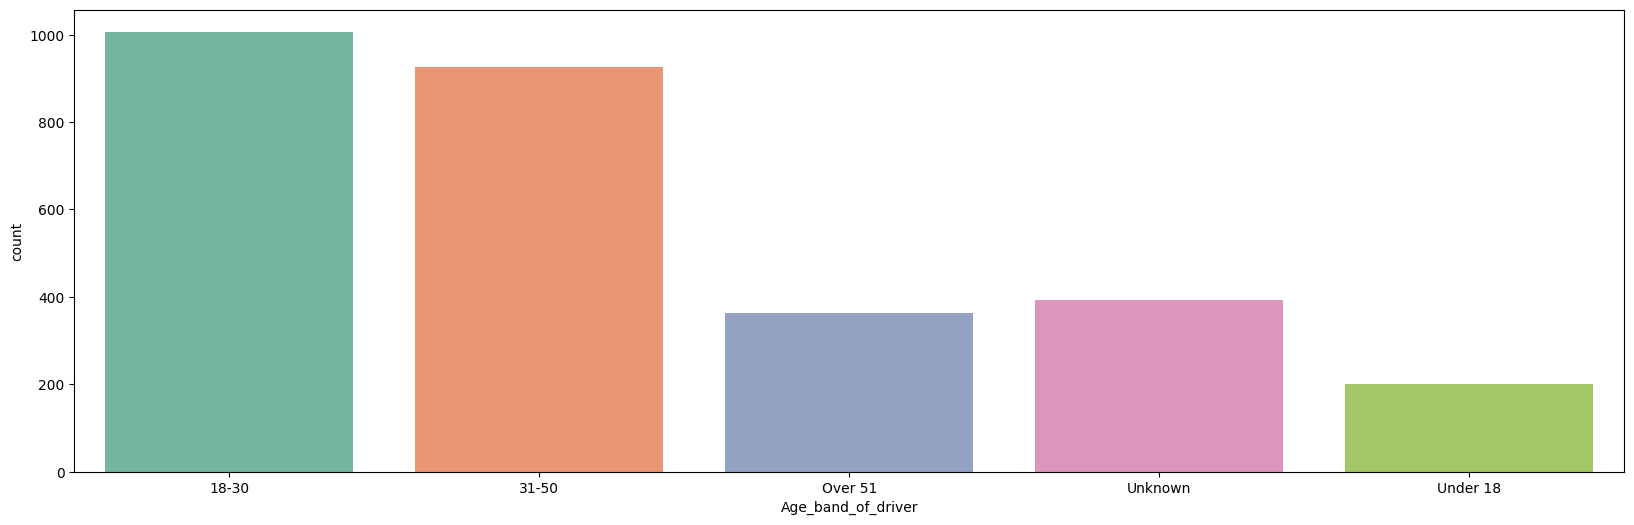

In [17]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Age_band_of_driver',data=data,palette='Set2')
plt.show()

In [18]:
## Drivers in the range of 18-30 had encountered more number of accidents.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\568324841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Driving_experience',data=data,palette='Set2')


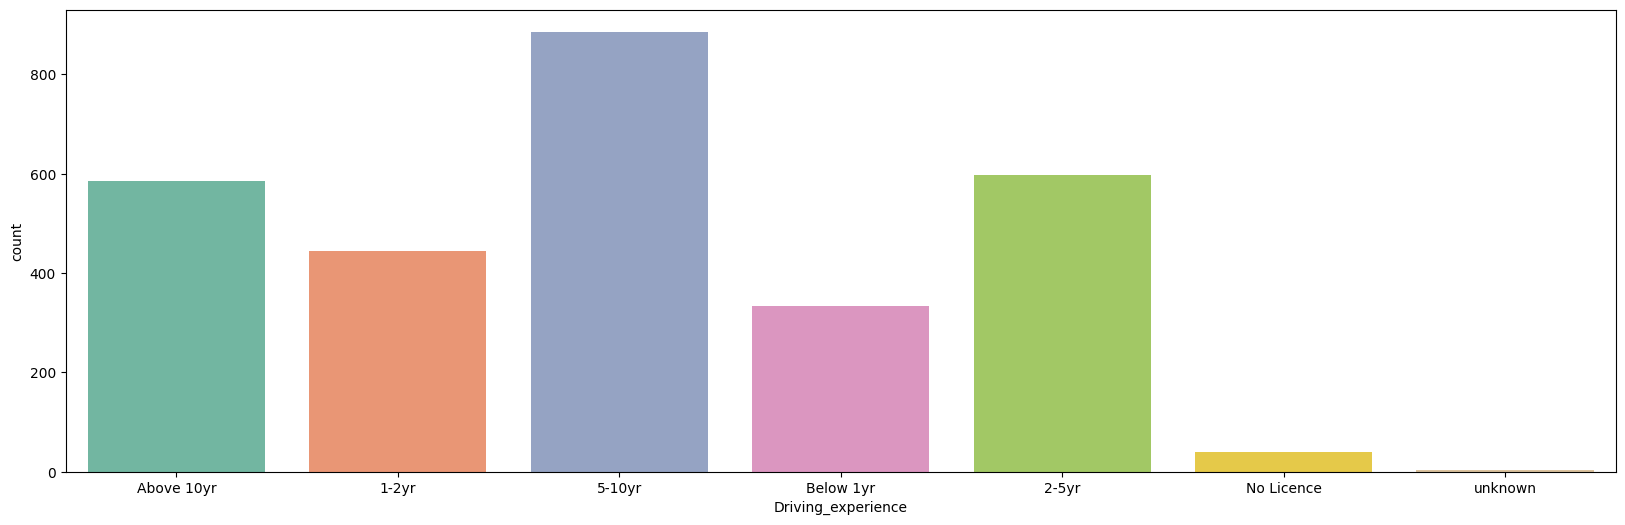

In [29]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Driving_experience',data=data,palette='Set2')
plt.show() 

In [27]:
## Drivers having driving experience between 5-10 years had encountered more number of accidents.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\4033191007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type_of_vehicle',data=data,palette='Set2')


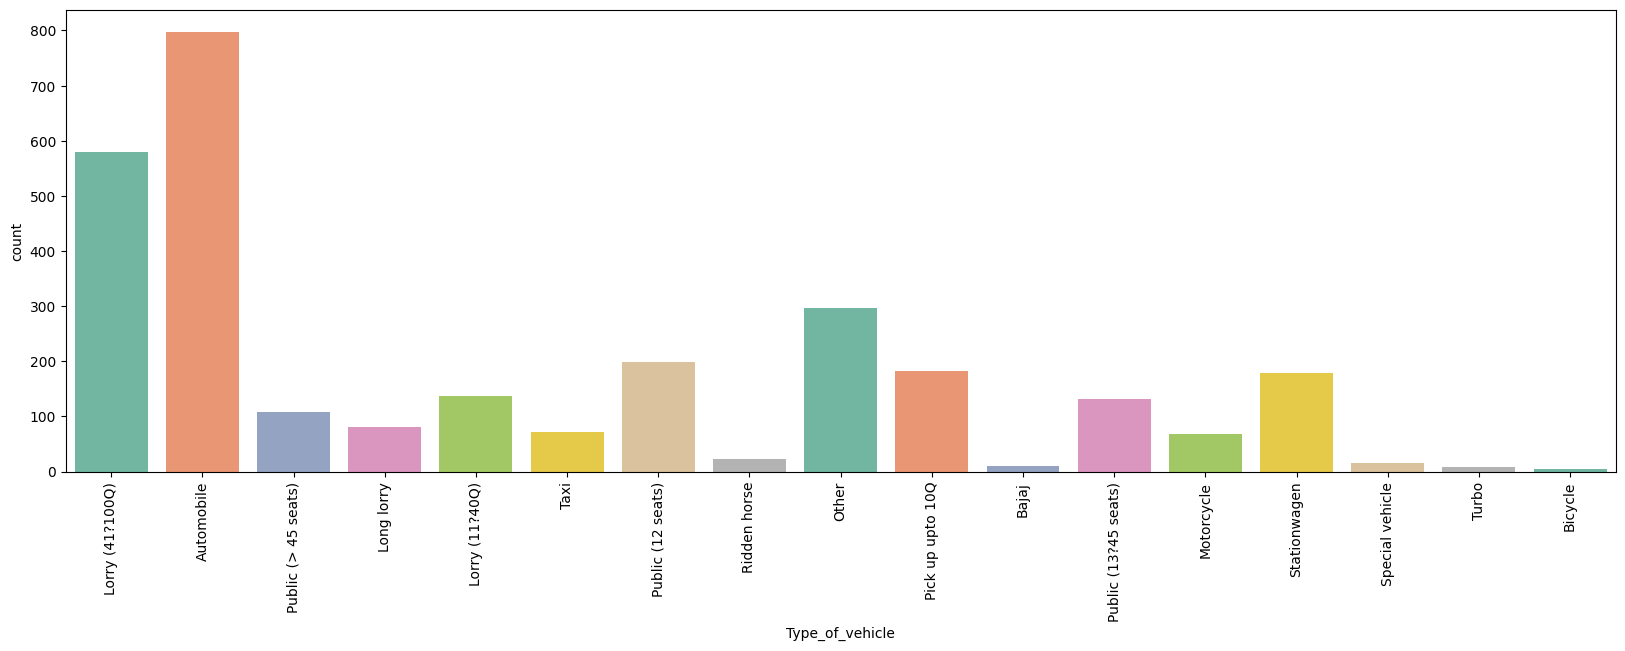

In [25]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Type_of_vehicle',data=data,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [34]:
## Automobile vehicles tends to had more number of acciedents following by Lorry.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\4102790293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cause_of_accident',data=data,palette='Set2',legend=False)


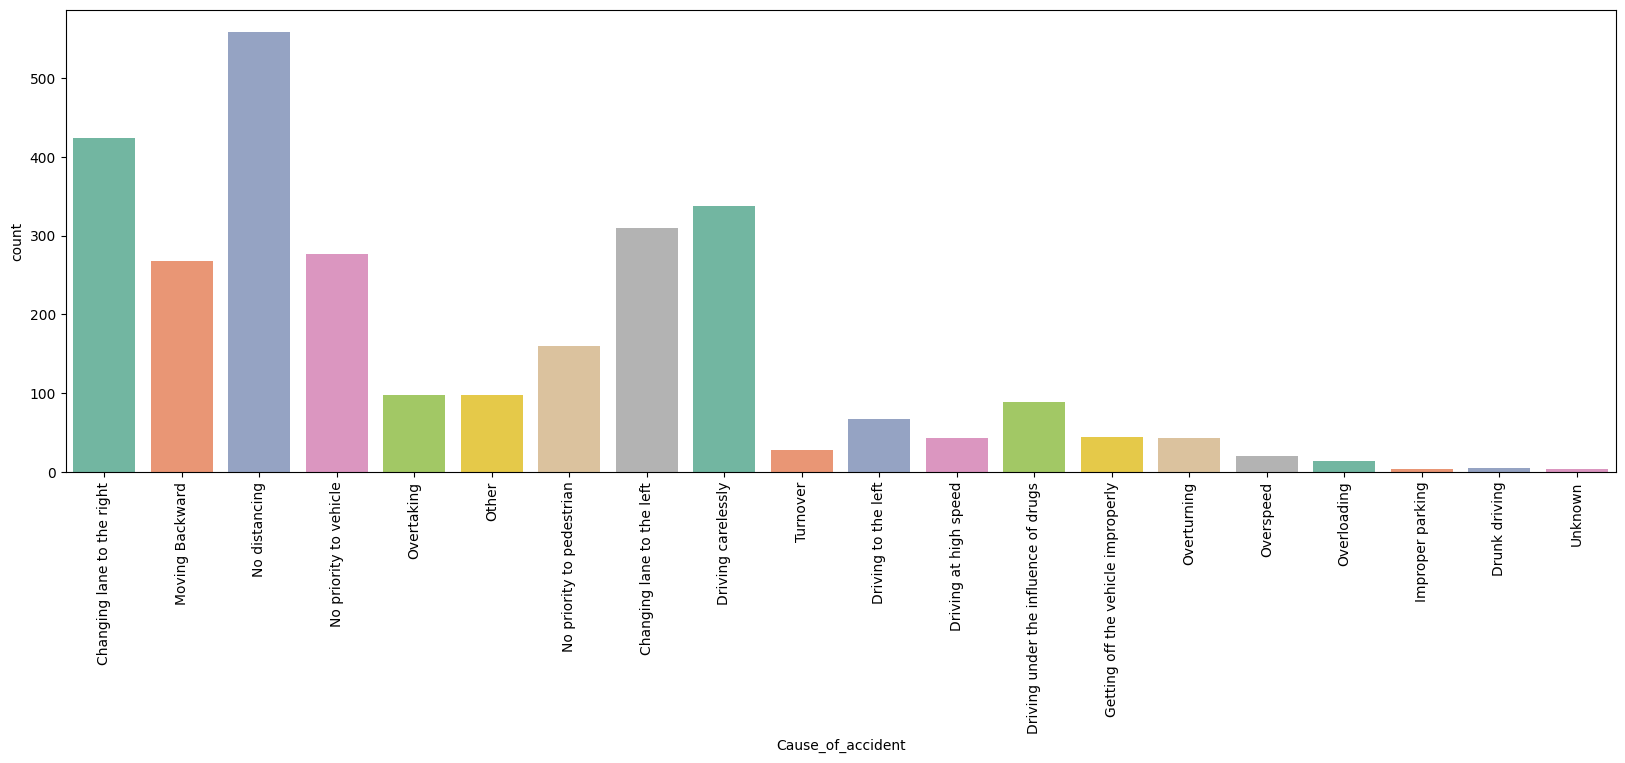

In [32]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Cause_of_accident',data=data,palette='Set2',legend=False)
plt.xticks(rotation=90)
plt.show()

In [33]:
## Major cause of most number of accidents are due to "No distancing"

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\576934543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_conditions',data=data,palette='Set2')


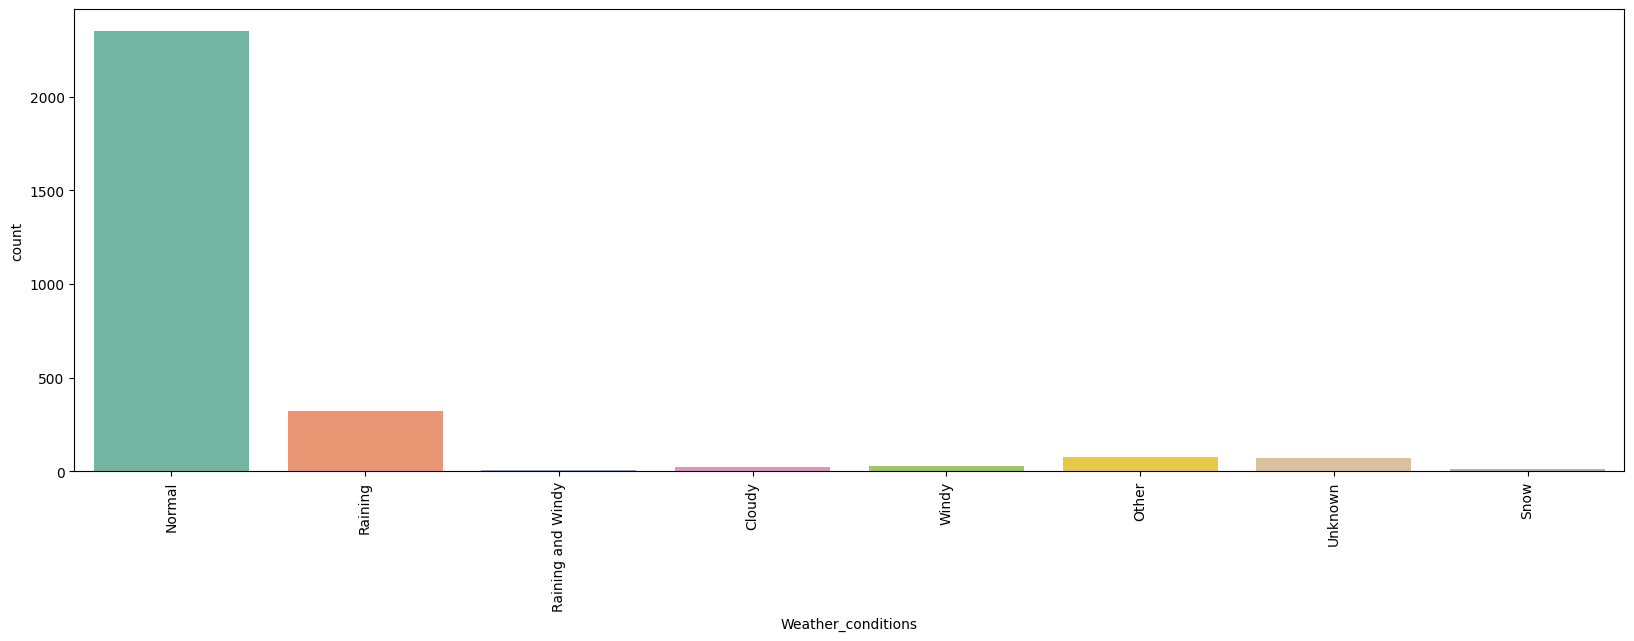

In [34]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Weather_conditions',data=data,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [35]:
## Weather conditions do not tend to have any major affect as most acciedents occured in Normal weather condition only.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\2159000082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Area_accident_occured',data=data,palette='Set2')


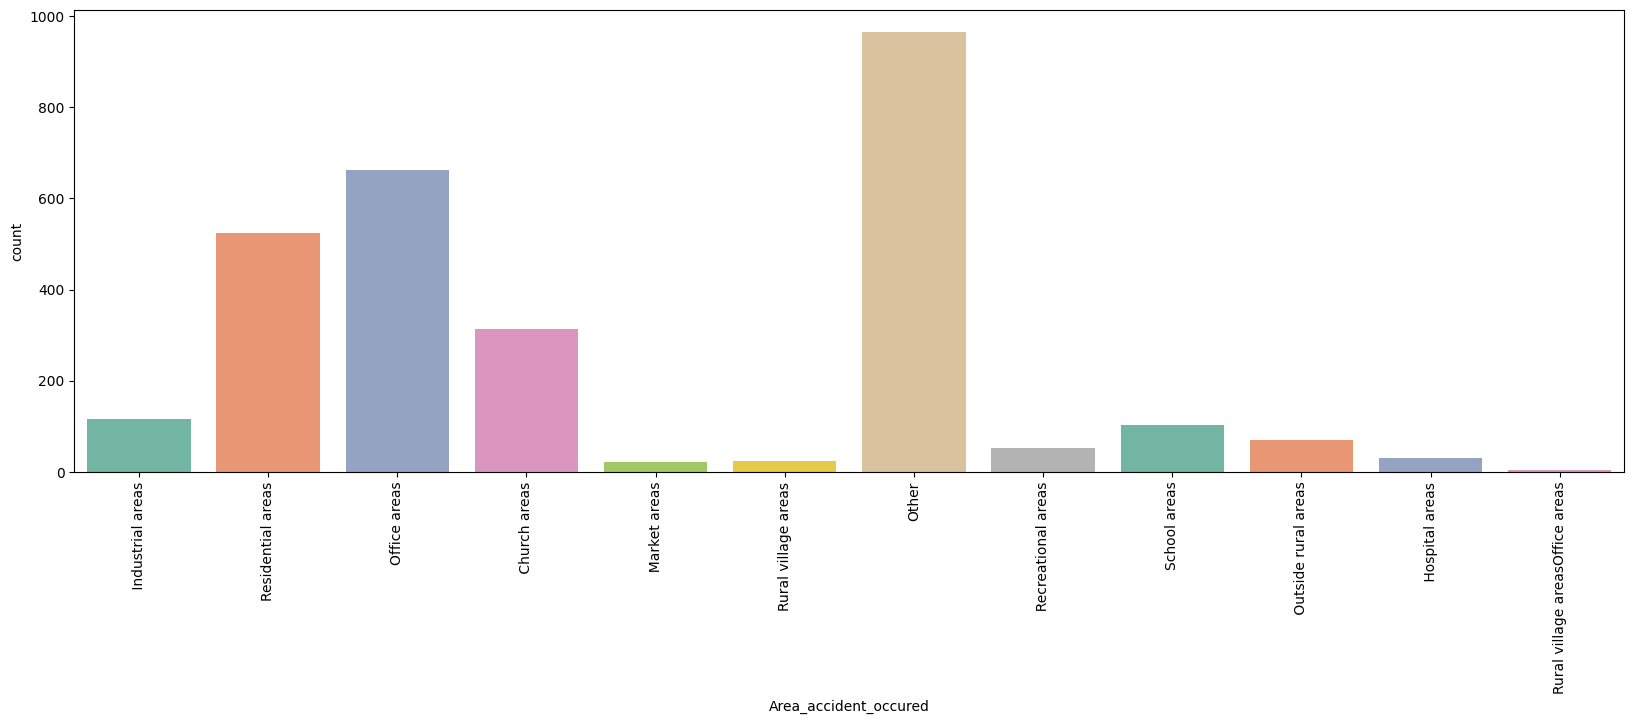

In [36]:
plt.figure(figsize = (20, 6))
sns.countplot(x='Area_accident_occured',data=data,palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [37]:
## Most acciends occured near office areas after other, so according measures should be taken to prevent this.

C:\Users\anmol\AppData\Local\Temp\ipykernel_3280\1302488095.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Hour',palette='Set2')


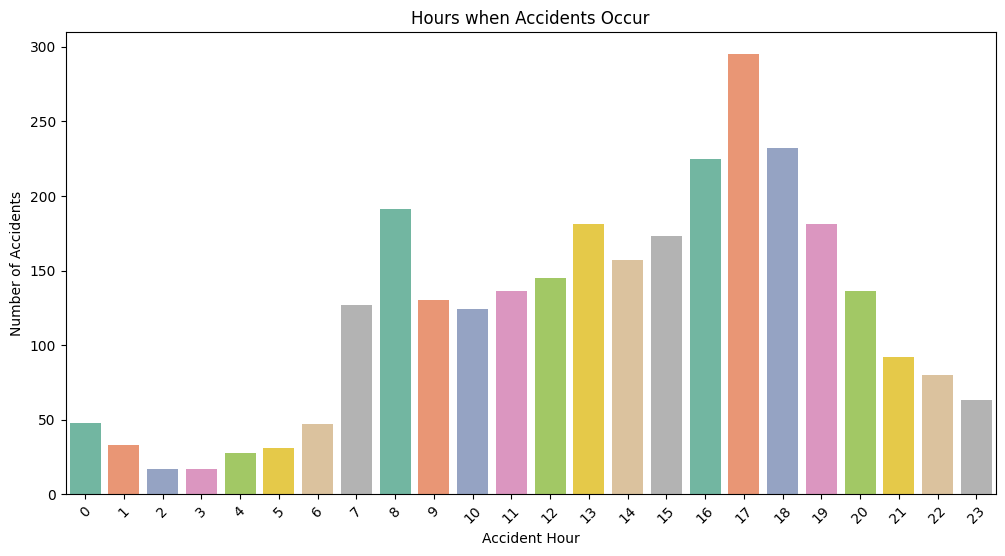

In [38]:
data[['Hour', 'Minute', 'Second']] = data['Time'].str.split(":", expand=True)
data['Hour'] = data['Hour'].astype(int)

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Hour',palette='Set2')
plt.xlabel("Accident Hour")
plt.ylabel("Number of Accidents")
plt.title("Hours when Accidents Occur")
plt.xticks(rotation=45)
plt.show()

In [39]:
## As we had seen previously, most accidents occur while there is daylight. Surely people who go to work at 8 am and leave at 4 or 5 pm meet and accidents occur.

## Multivariate Analysis

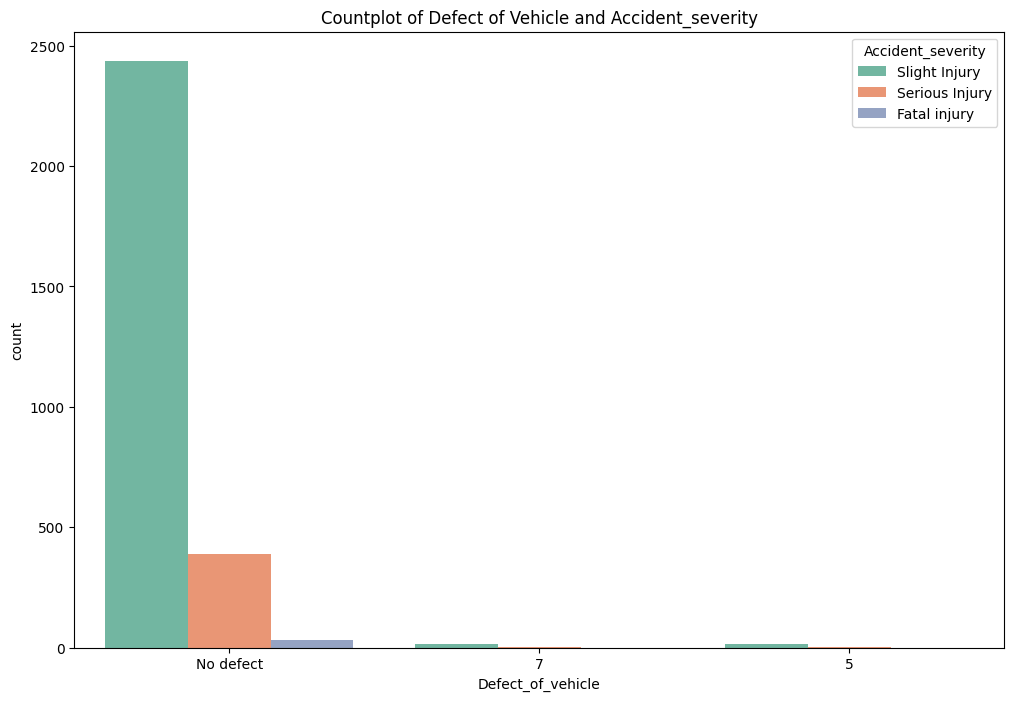

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=data,palette='Set2')
plt.title('Countplot of Defect of Vehicle and Accident_severity')
plt.show()

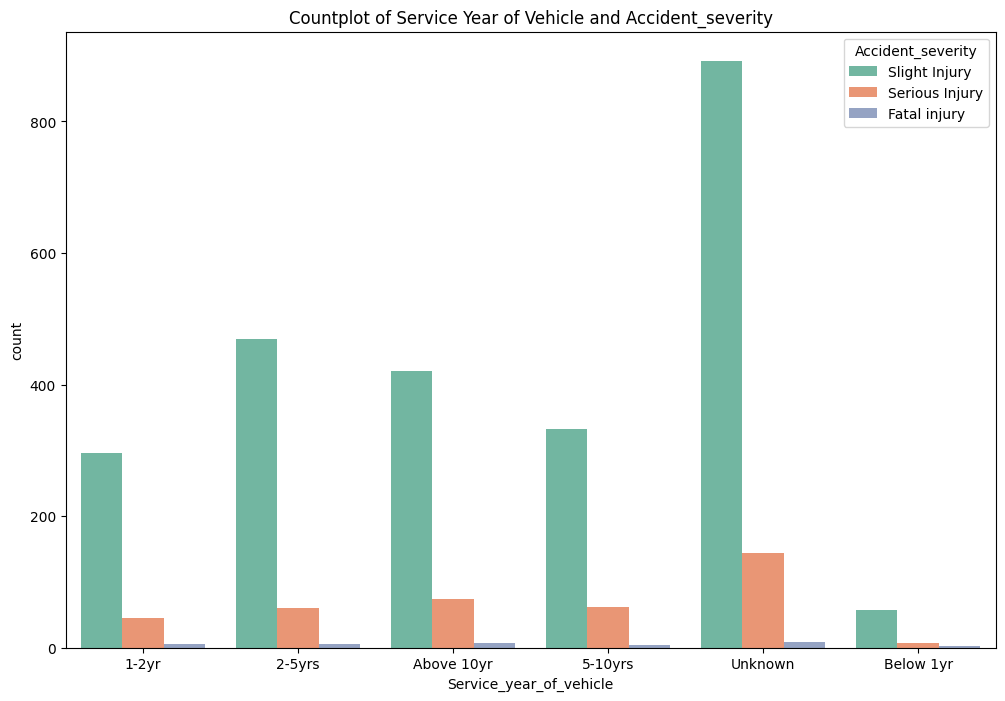

In [41]:
plt.figure(figsize=(12,8))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=data,palette='Set2')
plt.title('Countplot of Service Year of Vehicle and Accident_severity')
plt.show()

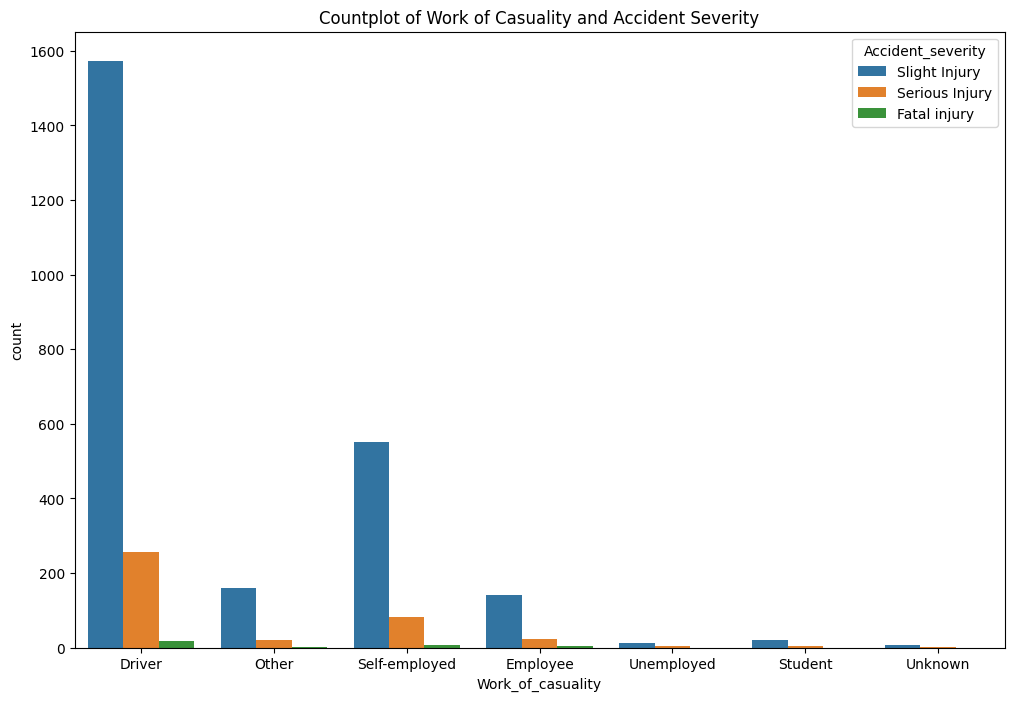

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=data)
plt.title("Countplot of Work of Casuality and Accident Severity")
plt.show()

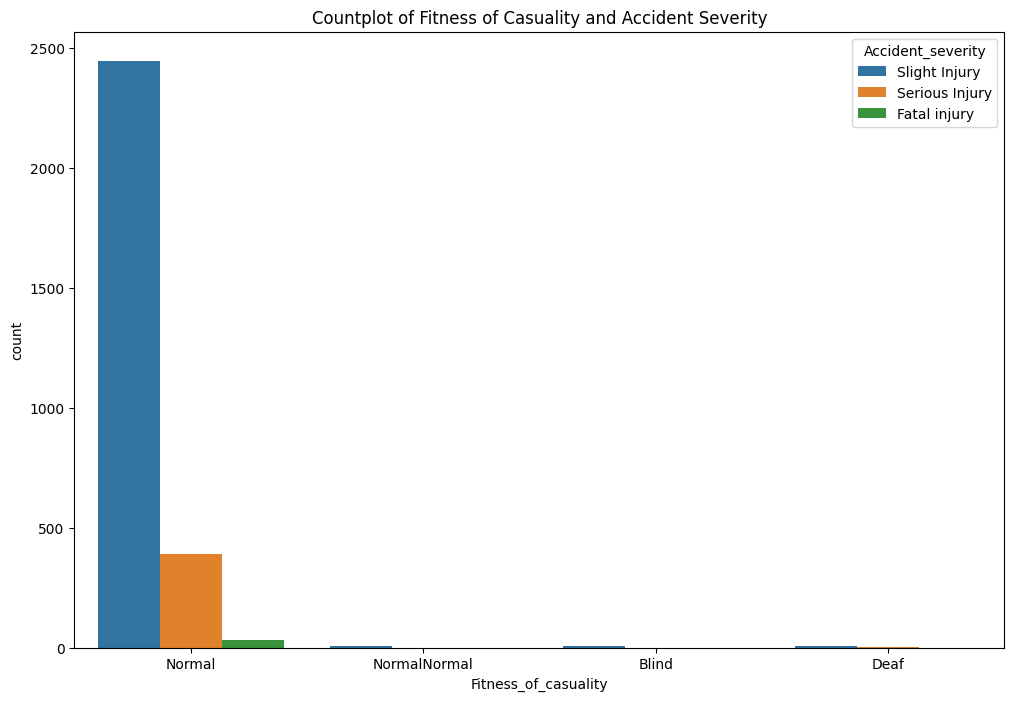

In [43]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fitness_of_casuality',hue='Accident_severity',data=data)
plt.title("Countplot of Fitness of Casuality and Accident Severity")
plt.show()

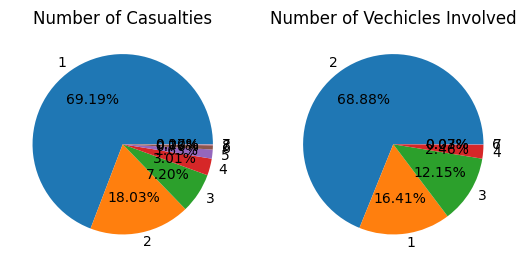

In [44]:
plt.subplot(1,2,1)
plt.title("Number of Casualties")
plt.pie(data.Number_of_casualties.value_counts(),autopct="%0.2f%%", labels=data.Number_of_casualties.value_counts().index)

plt.subplot(1,2,2)
plt.title("Number of Vechicles Involved")
plt.pie(data.Number_of_vehicles_involved.value_counts(),autopct="%0.2f%%", labels=data.Number_of_vehicles_involved.value_counts().index)

plt.show()

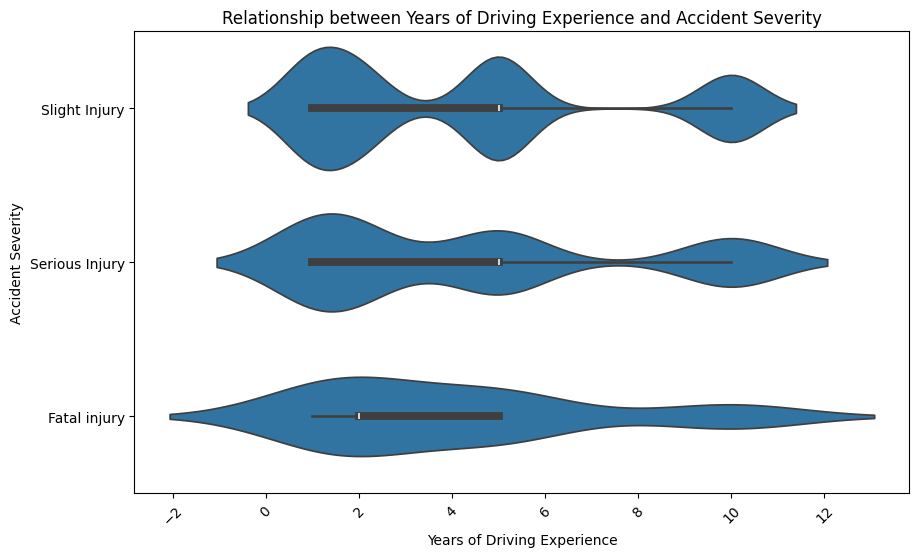

In [45]:
df_filtered = data[data['Driving_experience'] != 'Unknown']

df_filtered['Driving_experience'] = df_filtered['Driving_experience'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='Driving_experience', y='Accident_severity')
plt.xlabel("Years of Driving Experience")
plt.ylabel("Accident Severity")
plt.title("Relationship between Years of Driving Experience and Accident Severity")
plt.xticks(rotation=45)
plt.show()

# Collective Visualization

In [46]:
cols = data.select_dtypes(exclude="int")
cols = cols.columns[1:]
cols

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Minute', 'Second'],
      dtype='object')

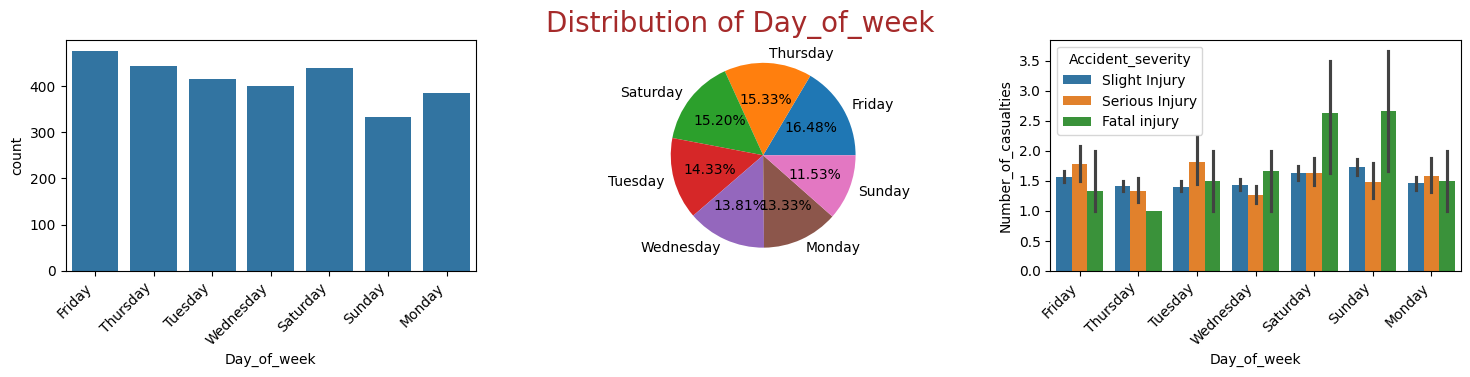

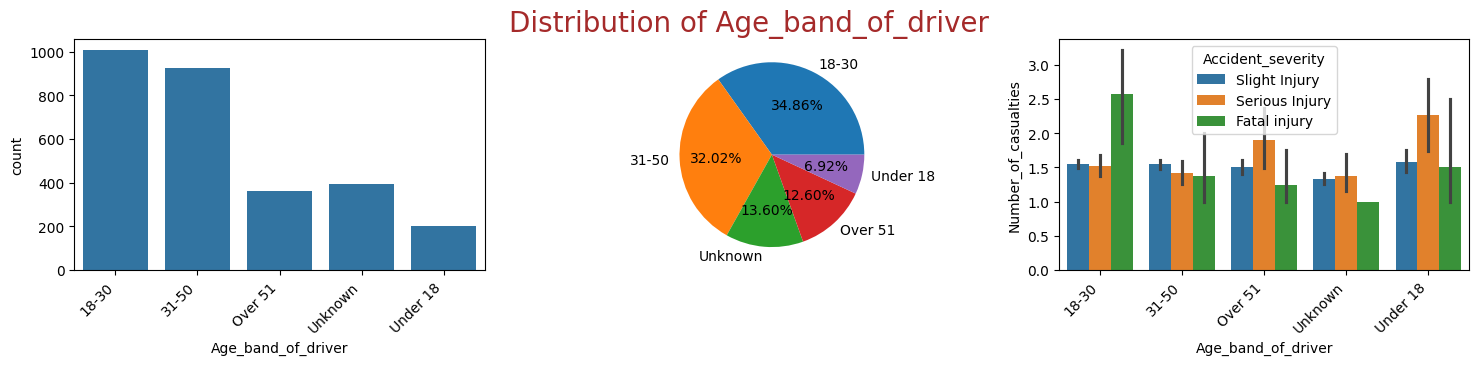

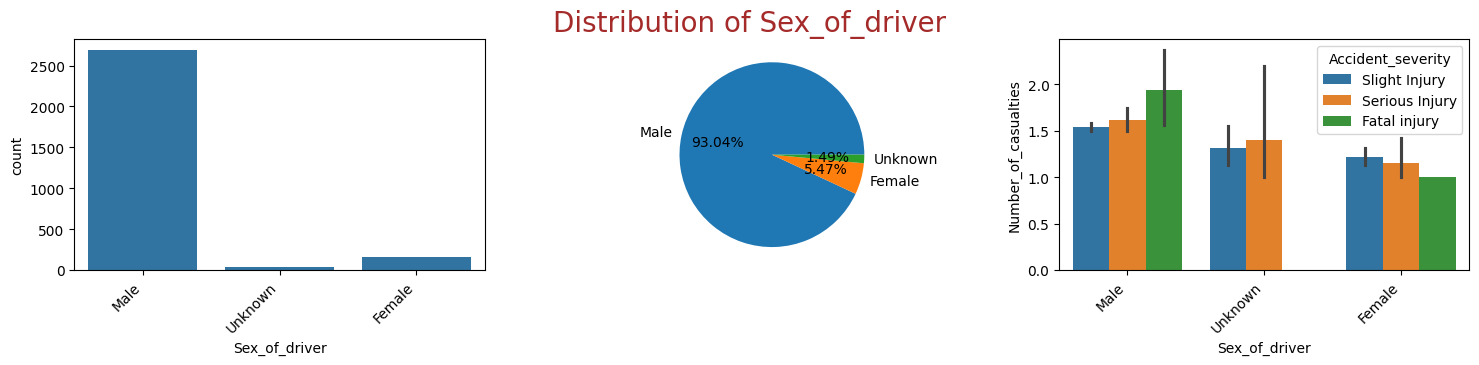

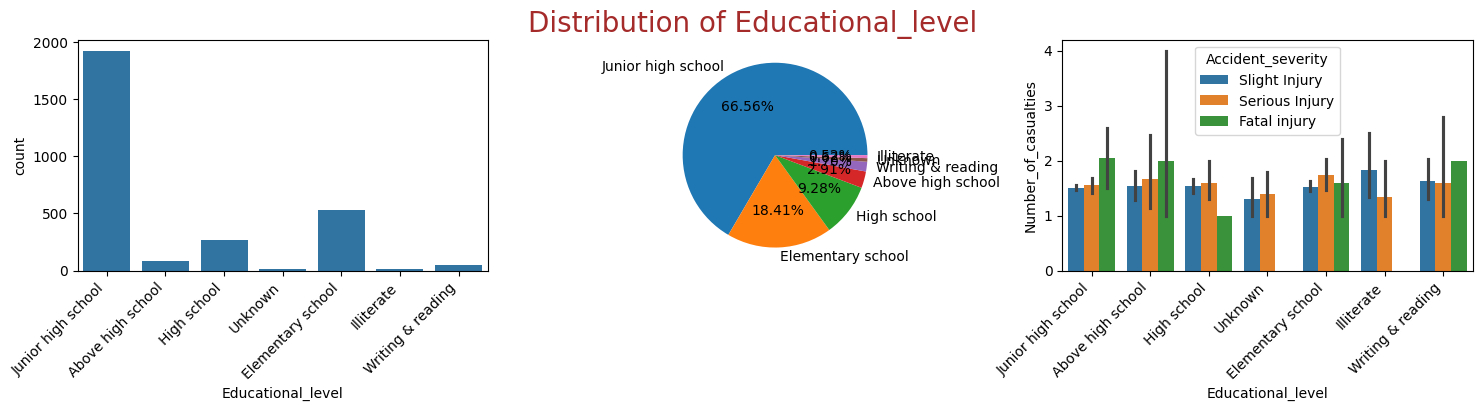

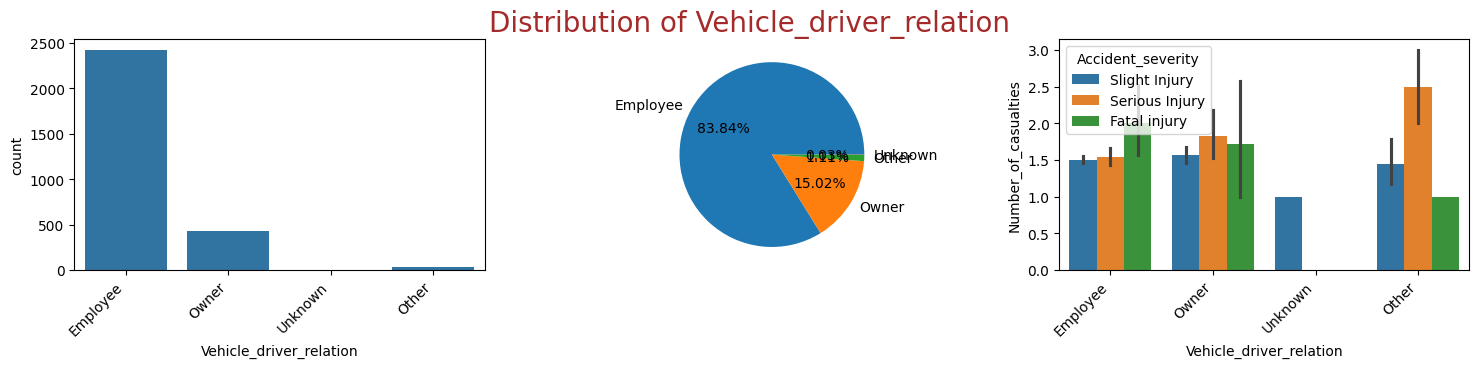

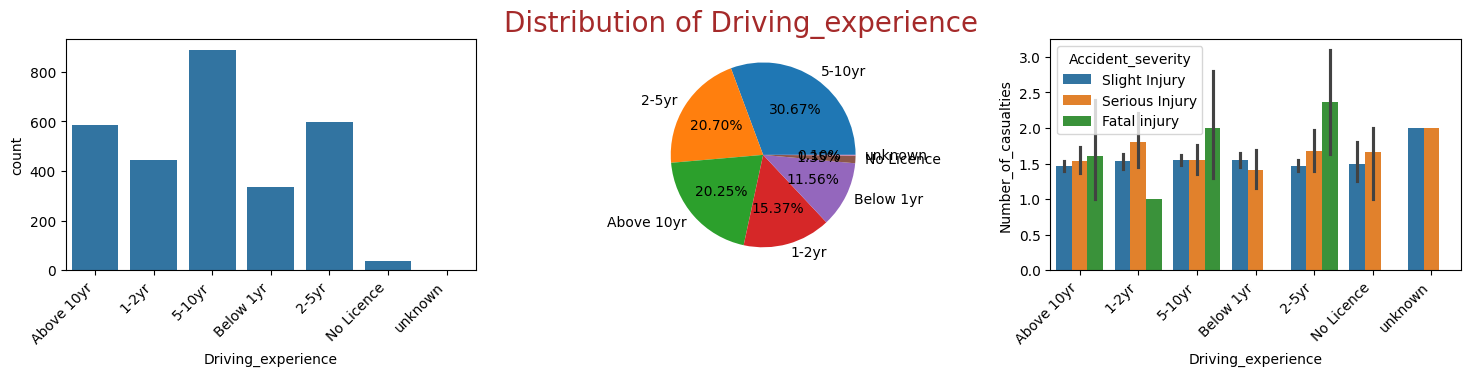

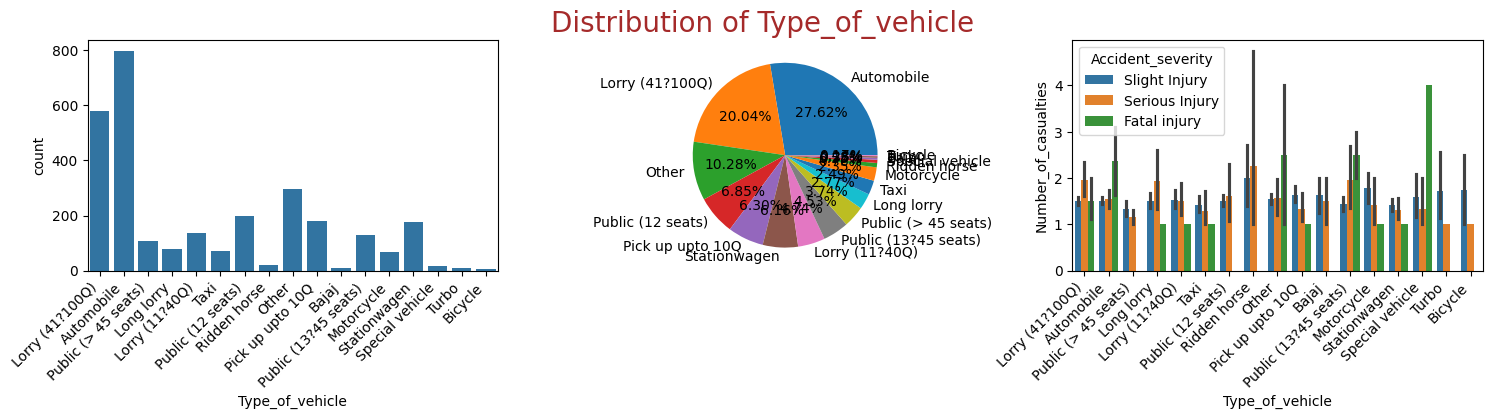

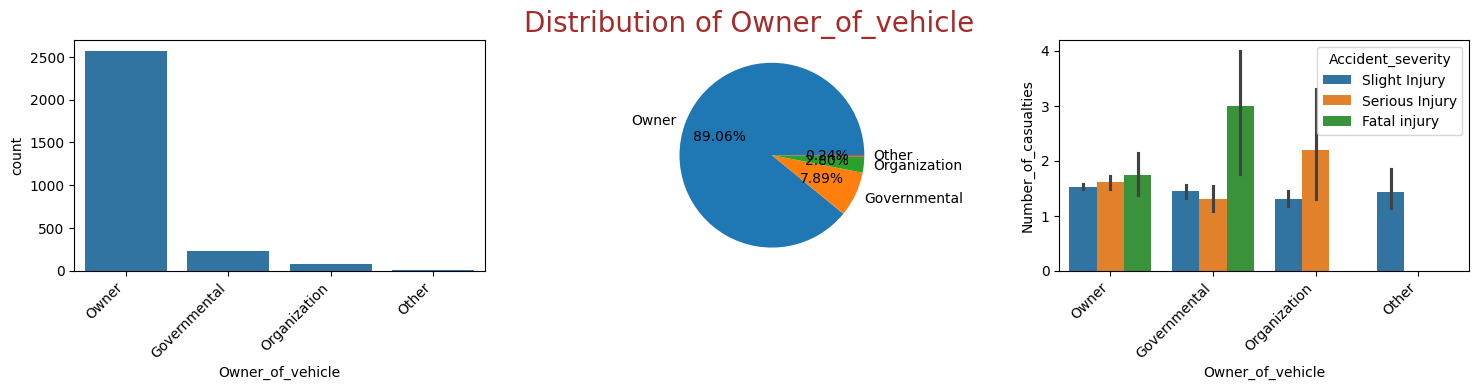

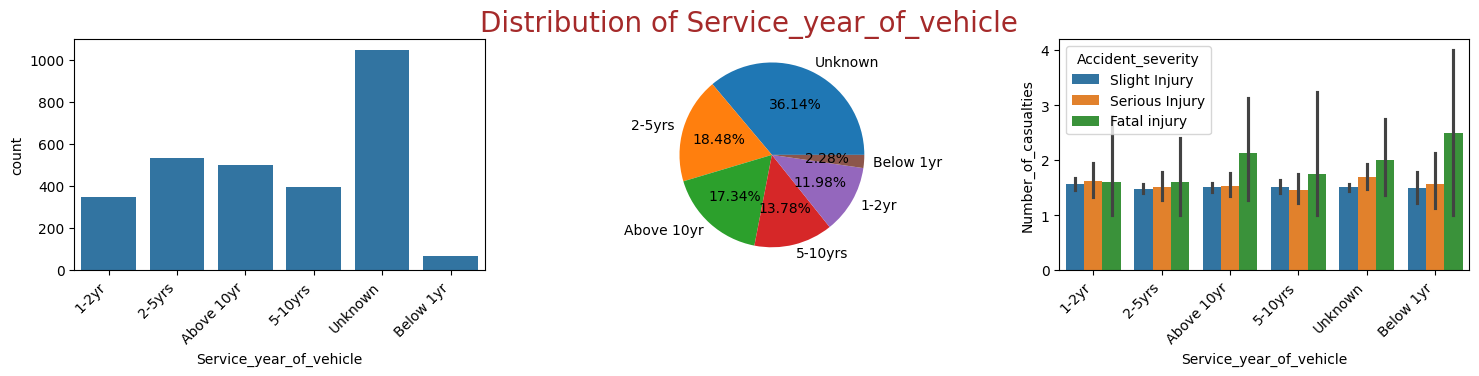

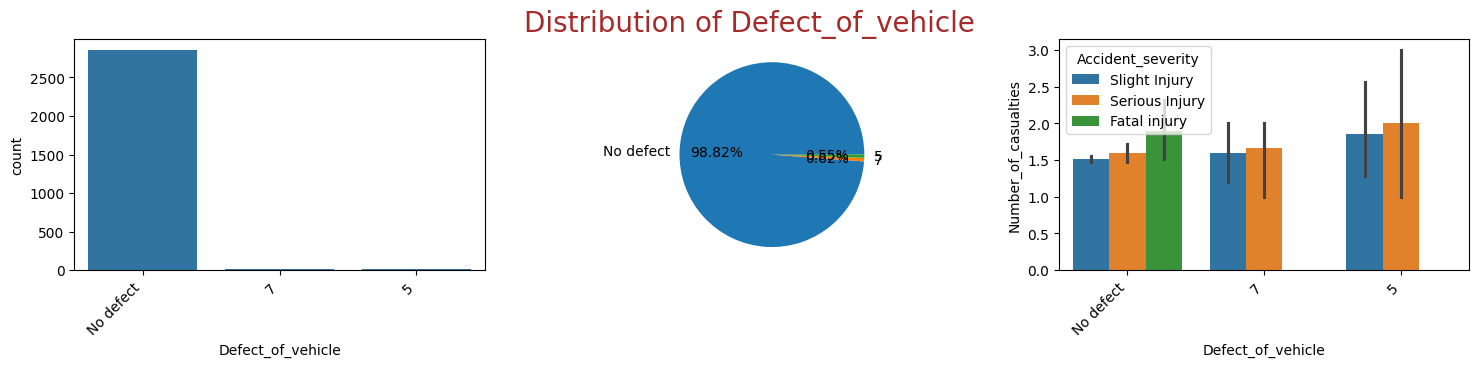

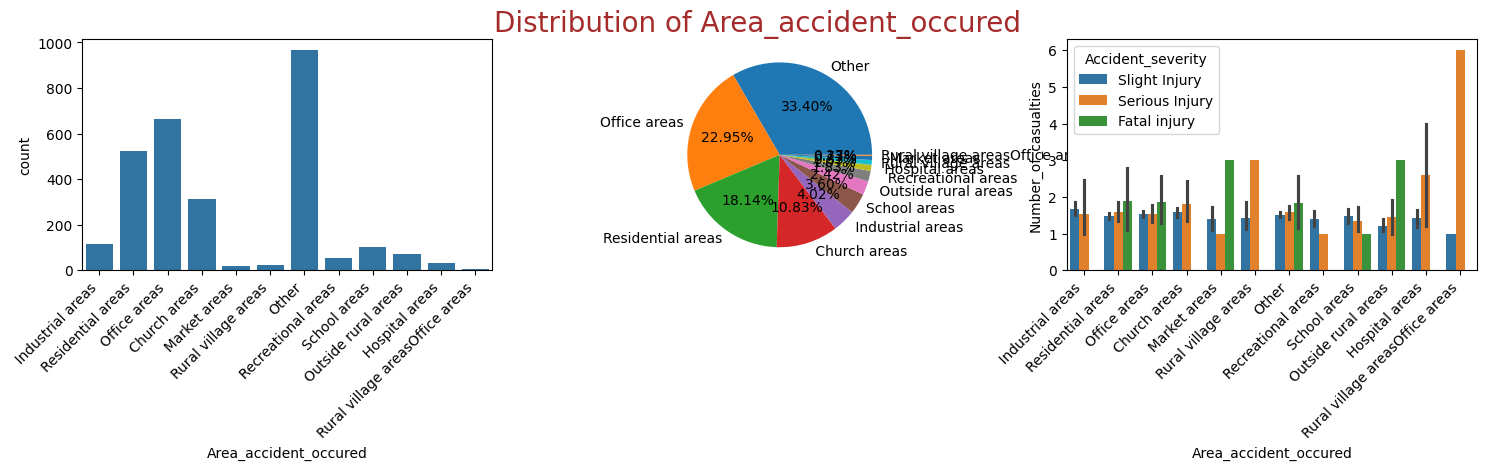

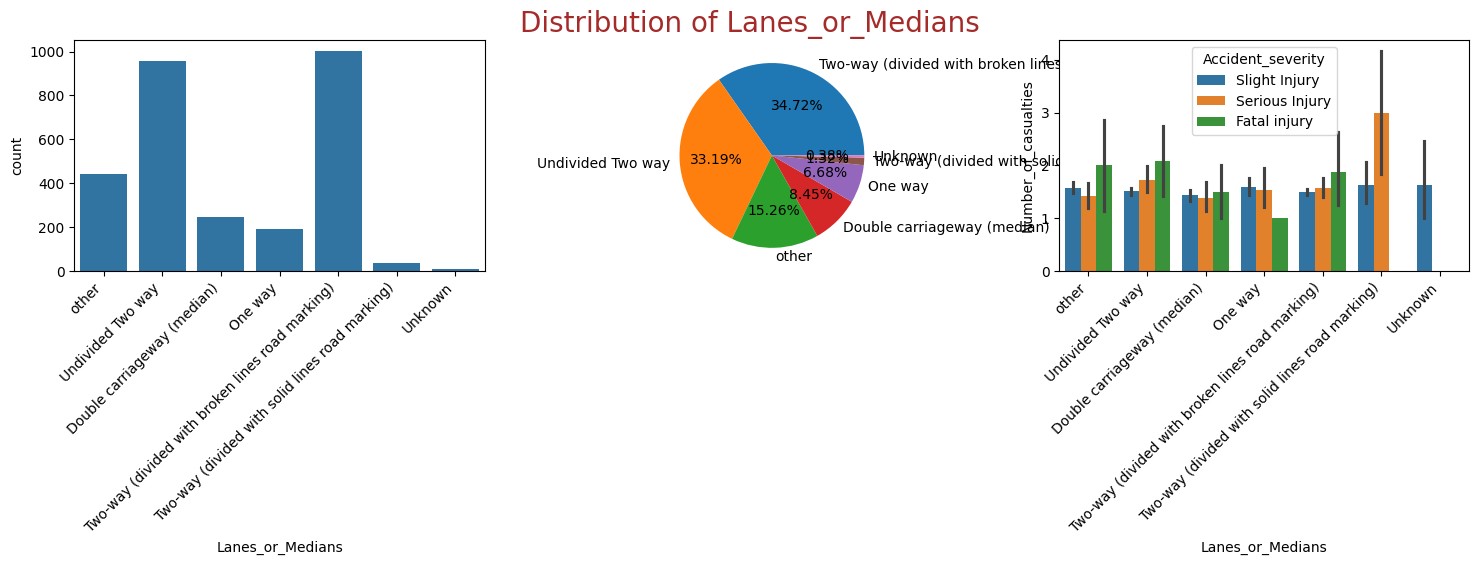

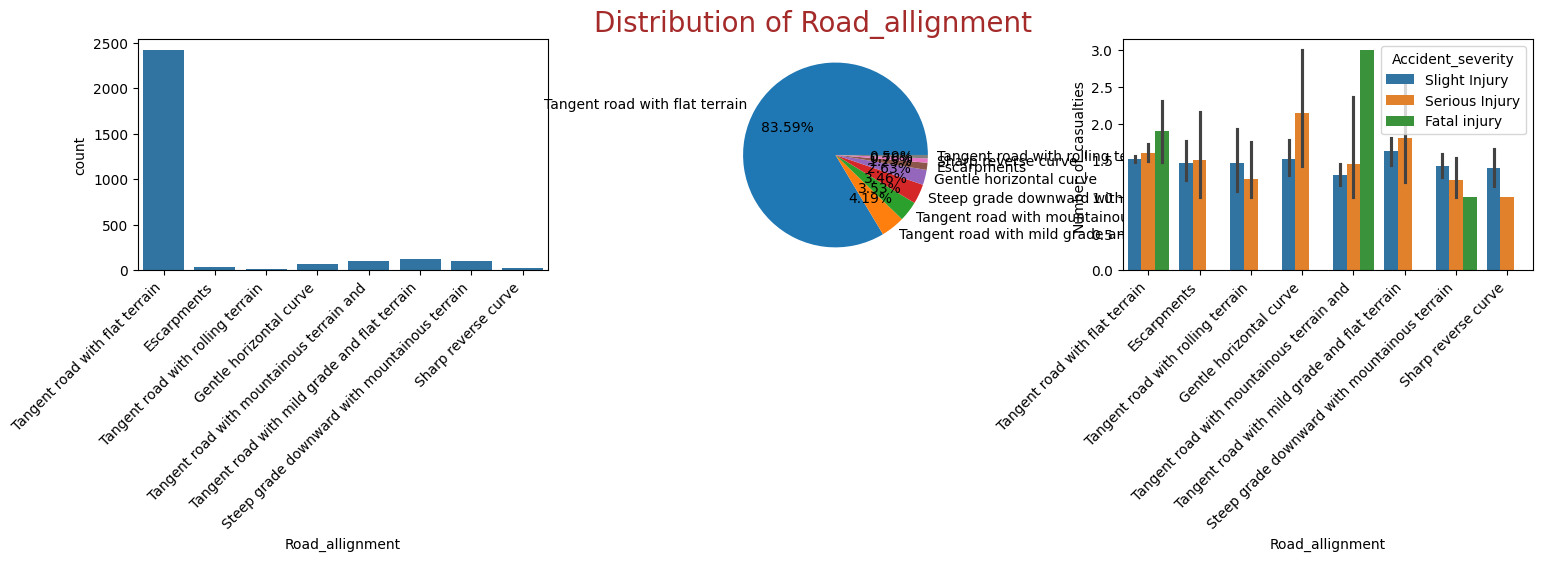

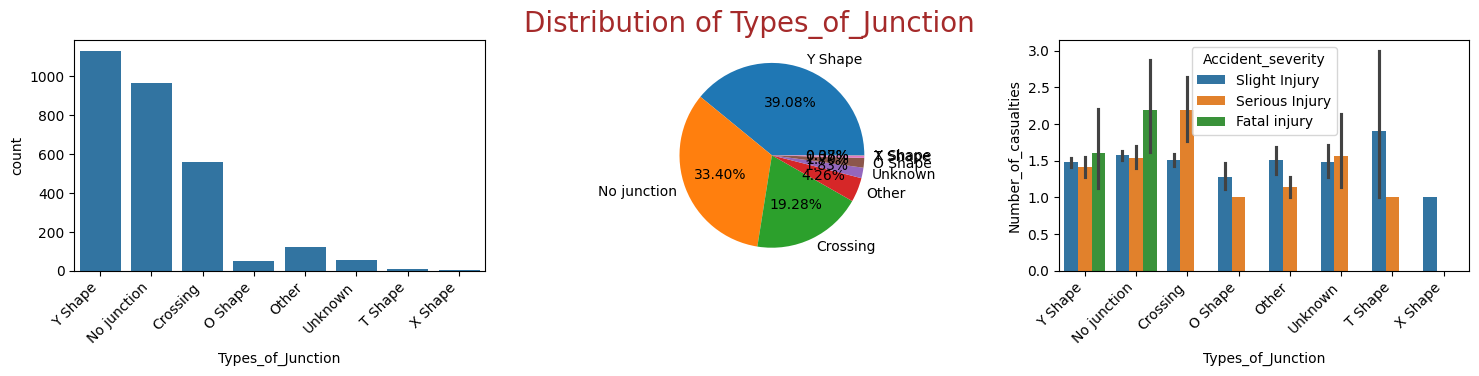

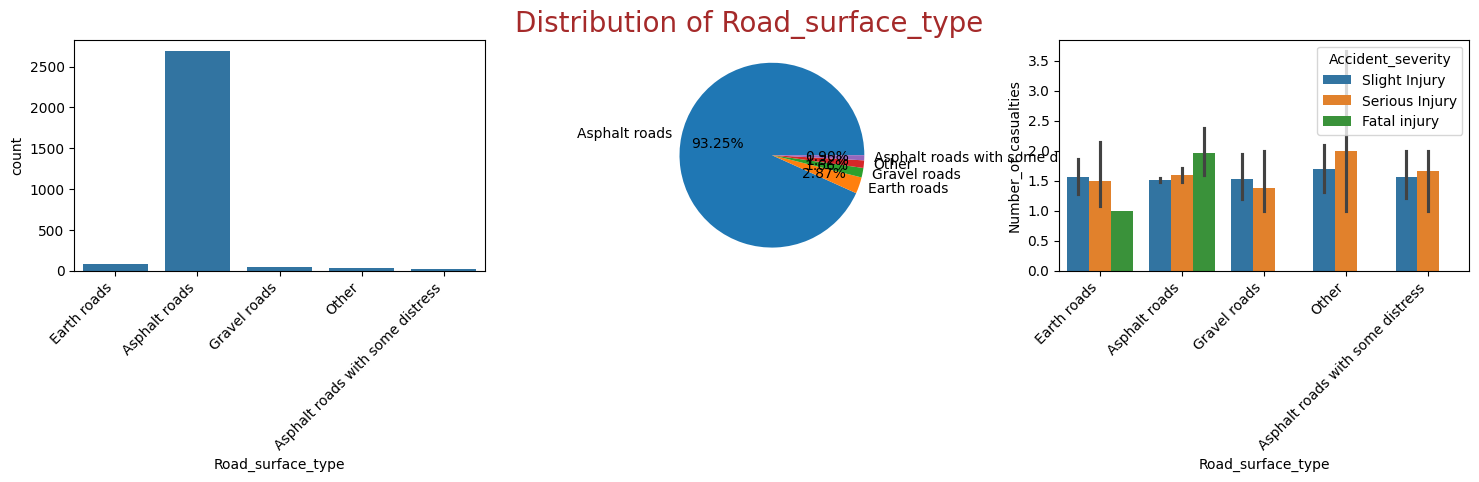

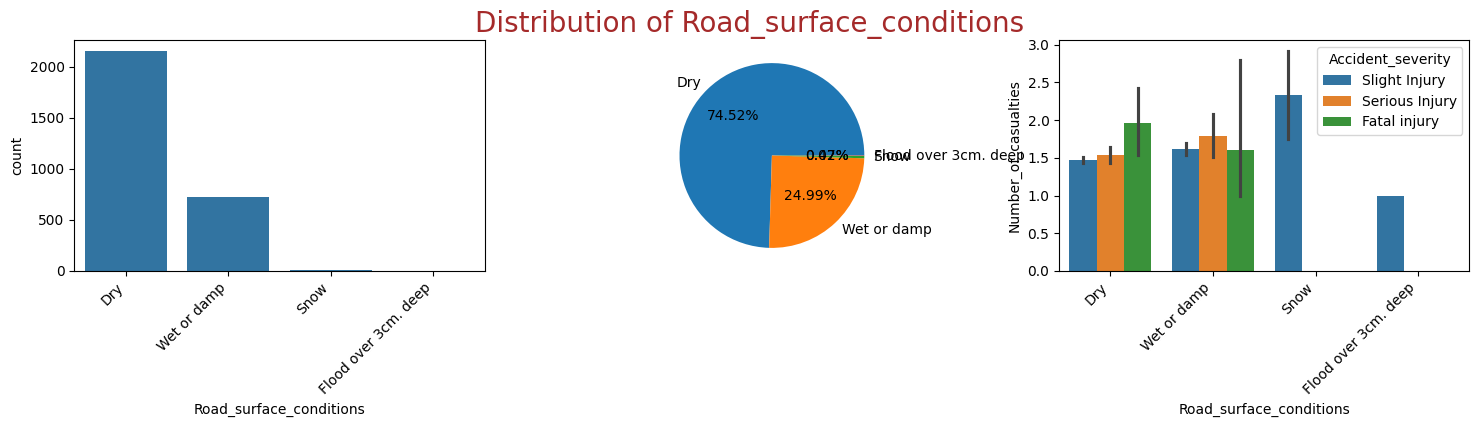

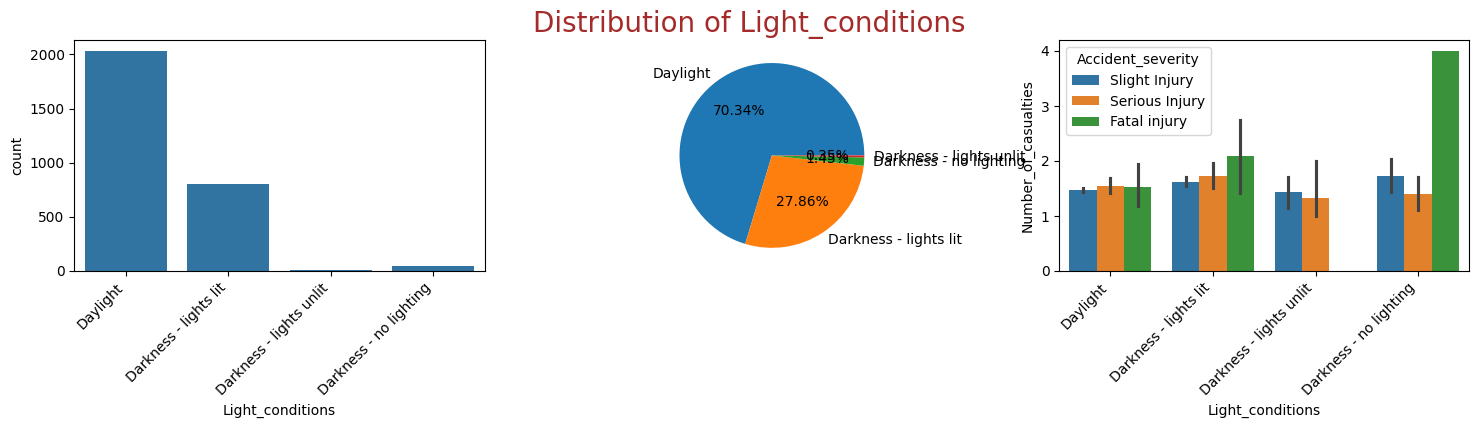

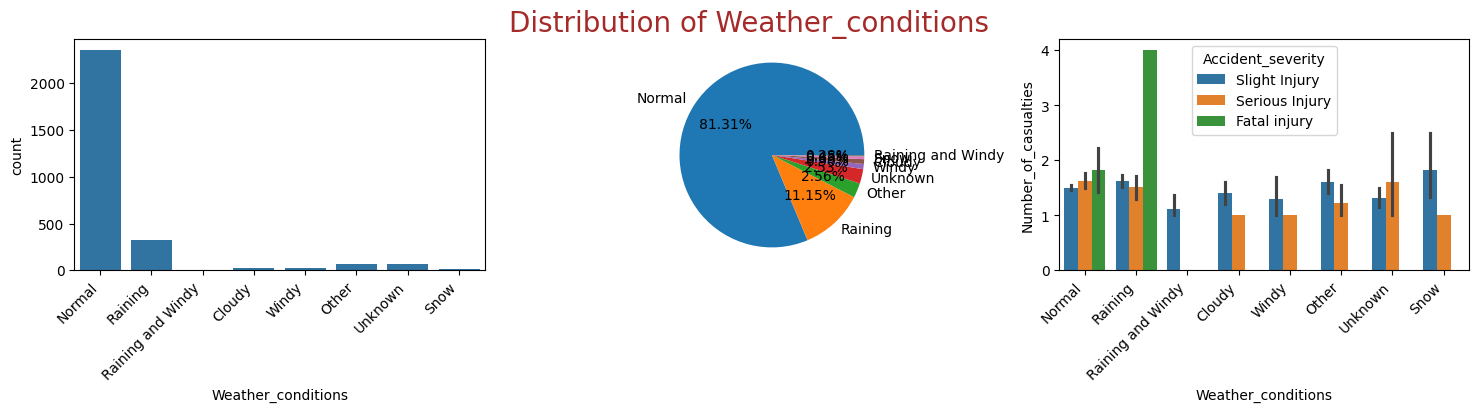

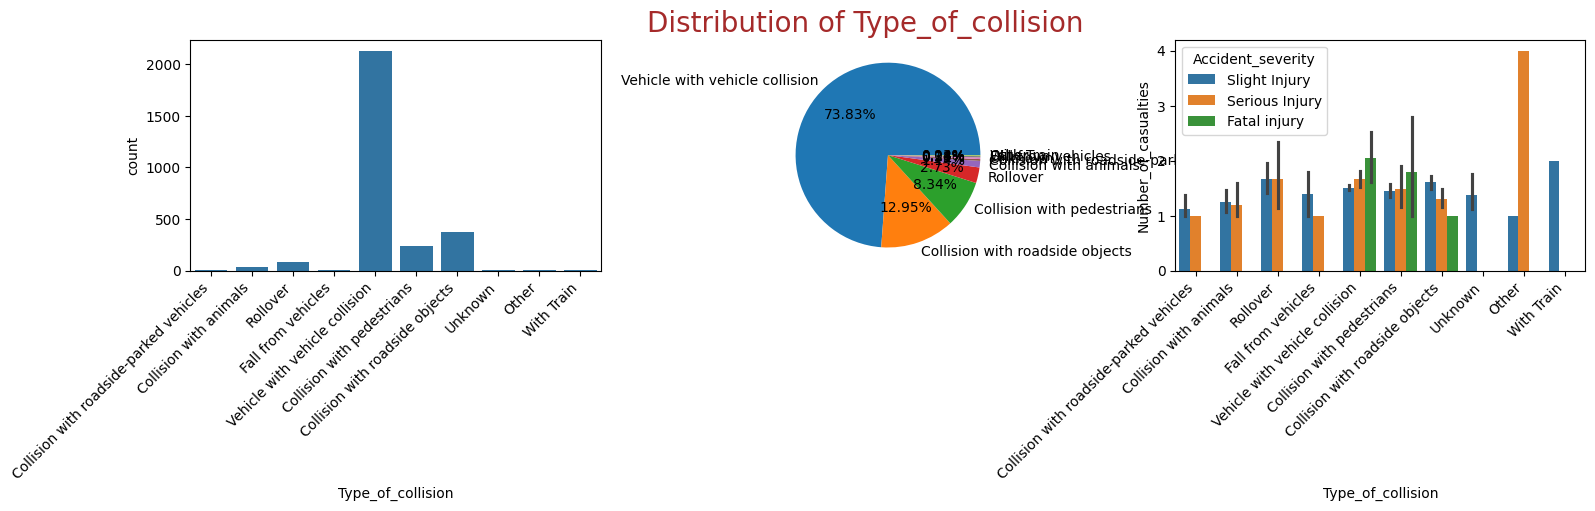

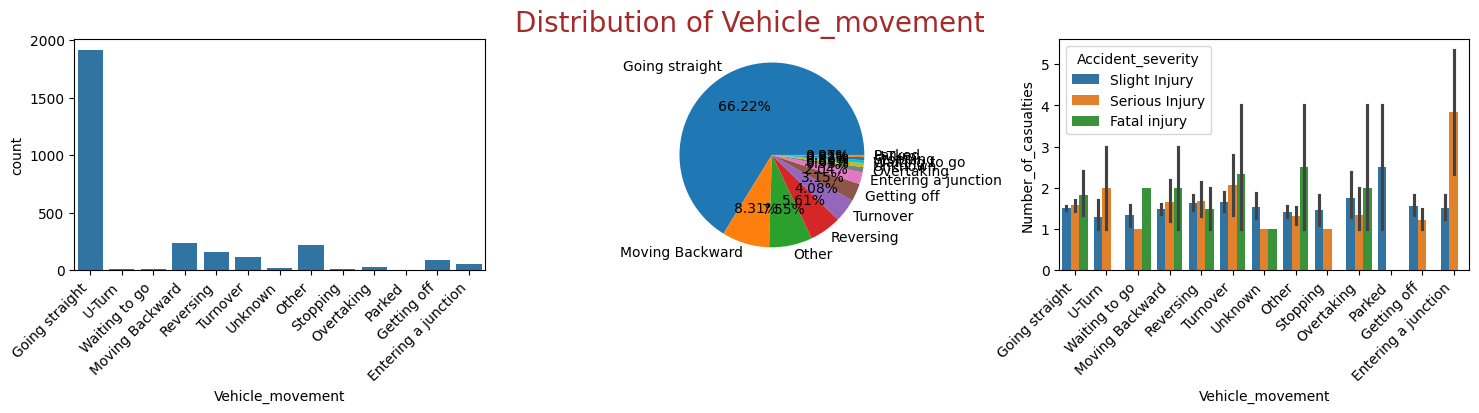

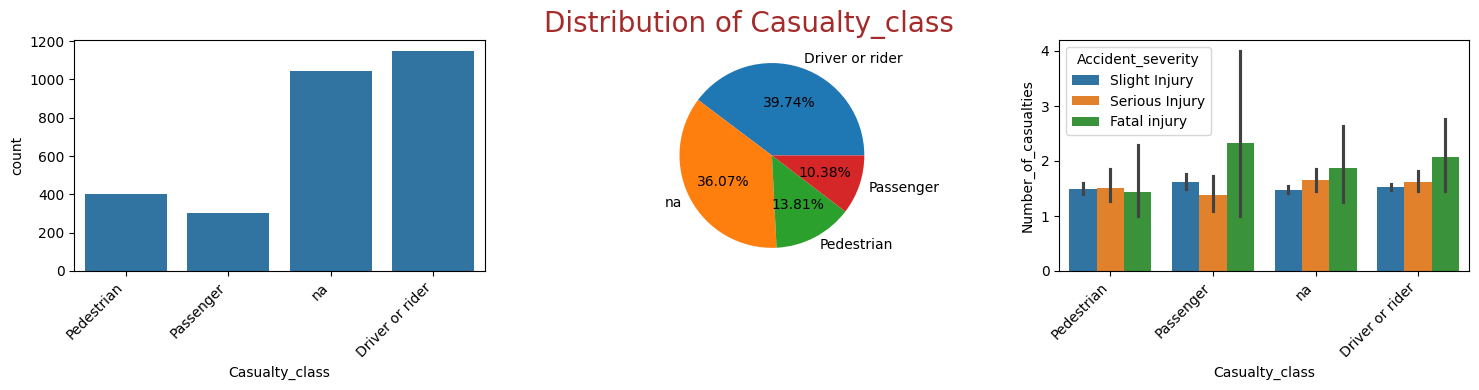

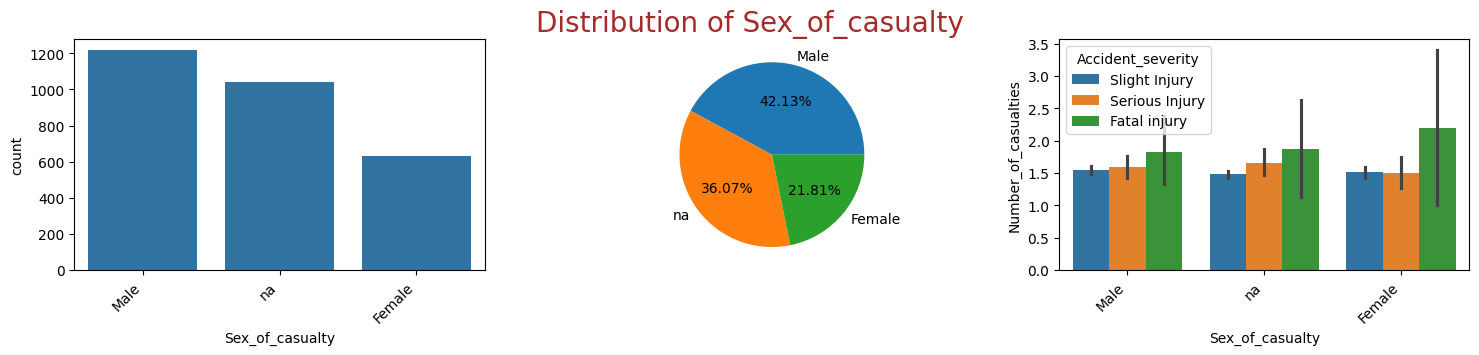

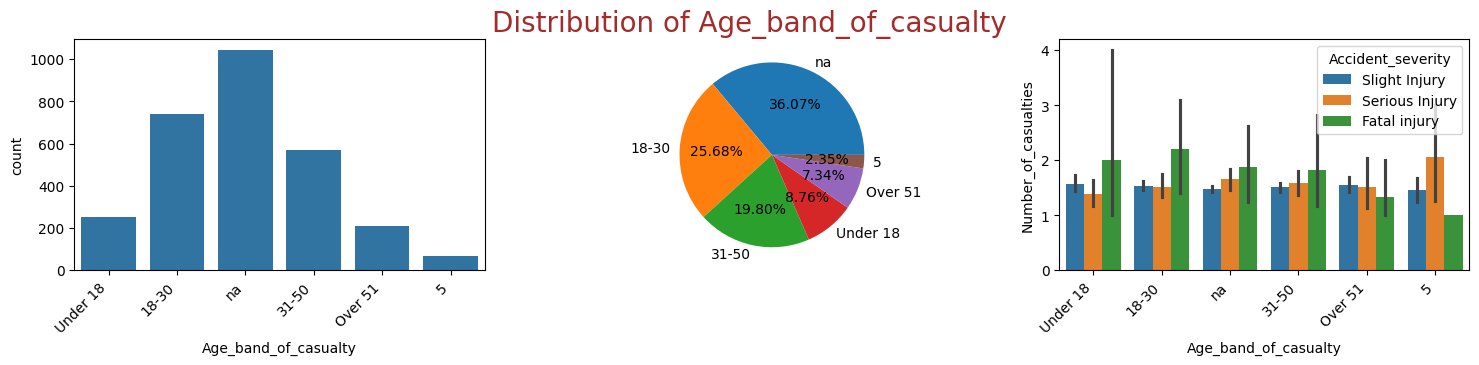

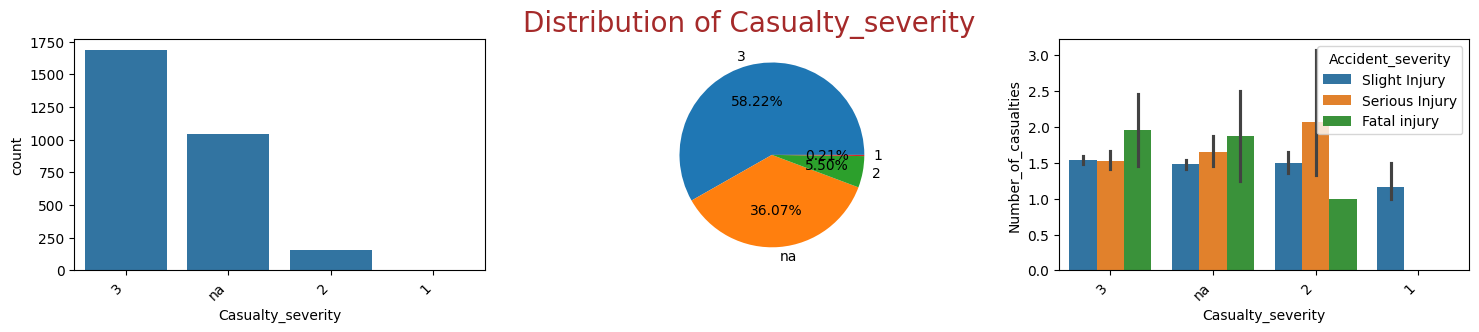

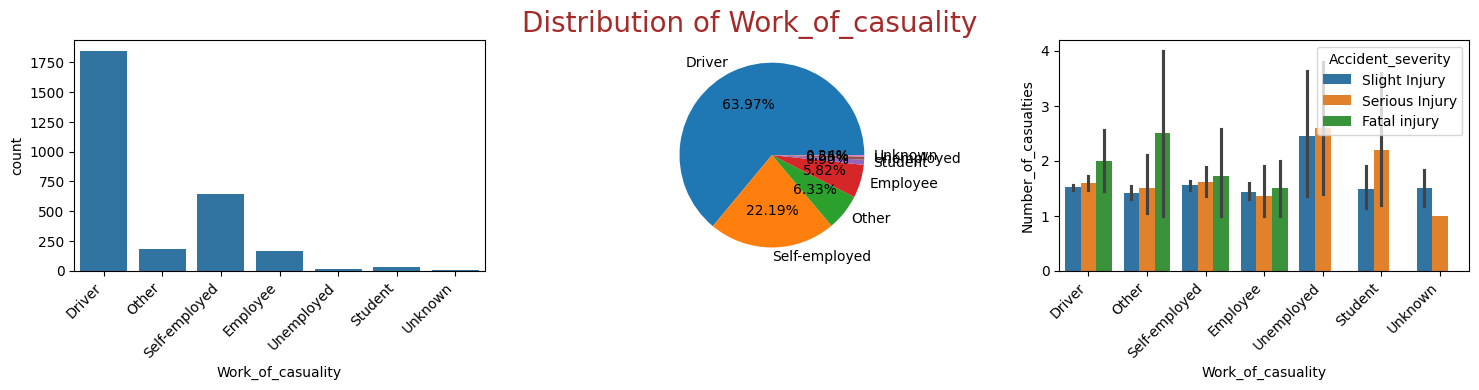

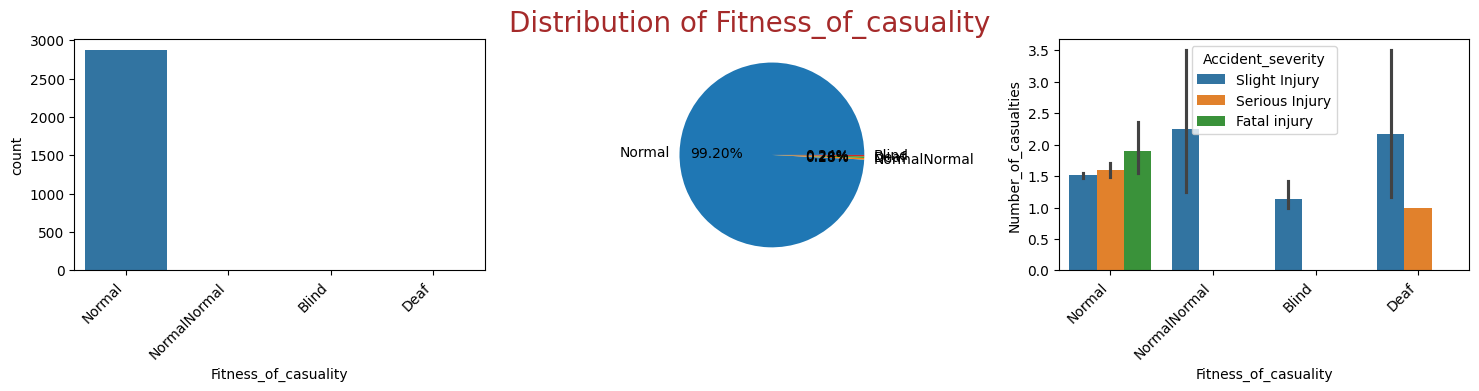

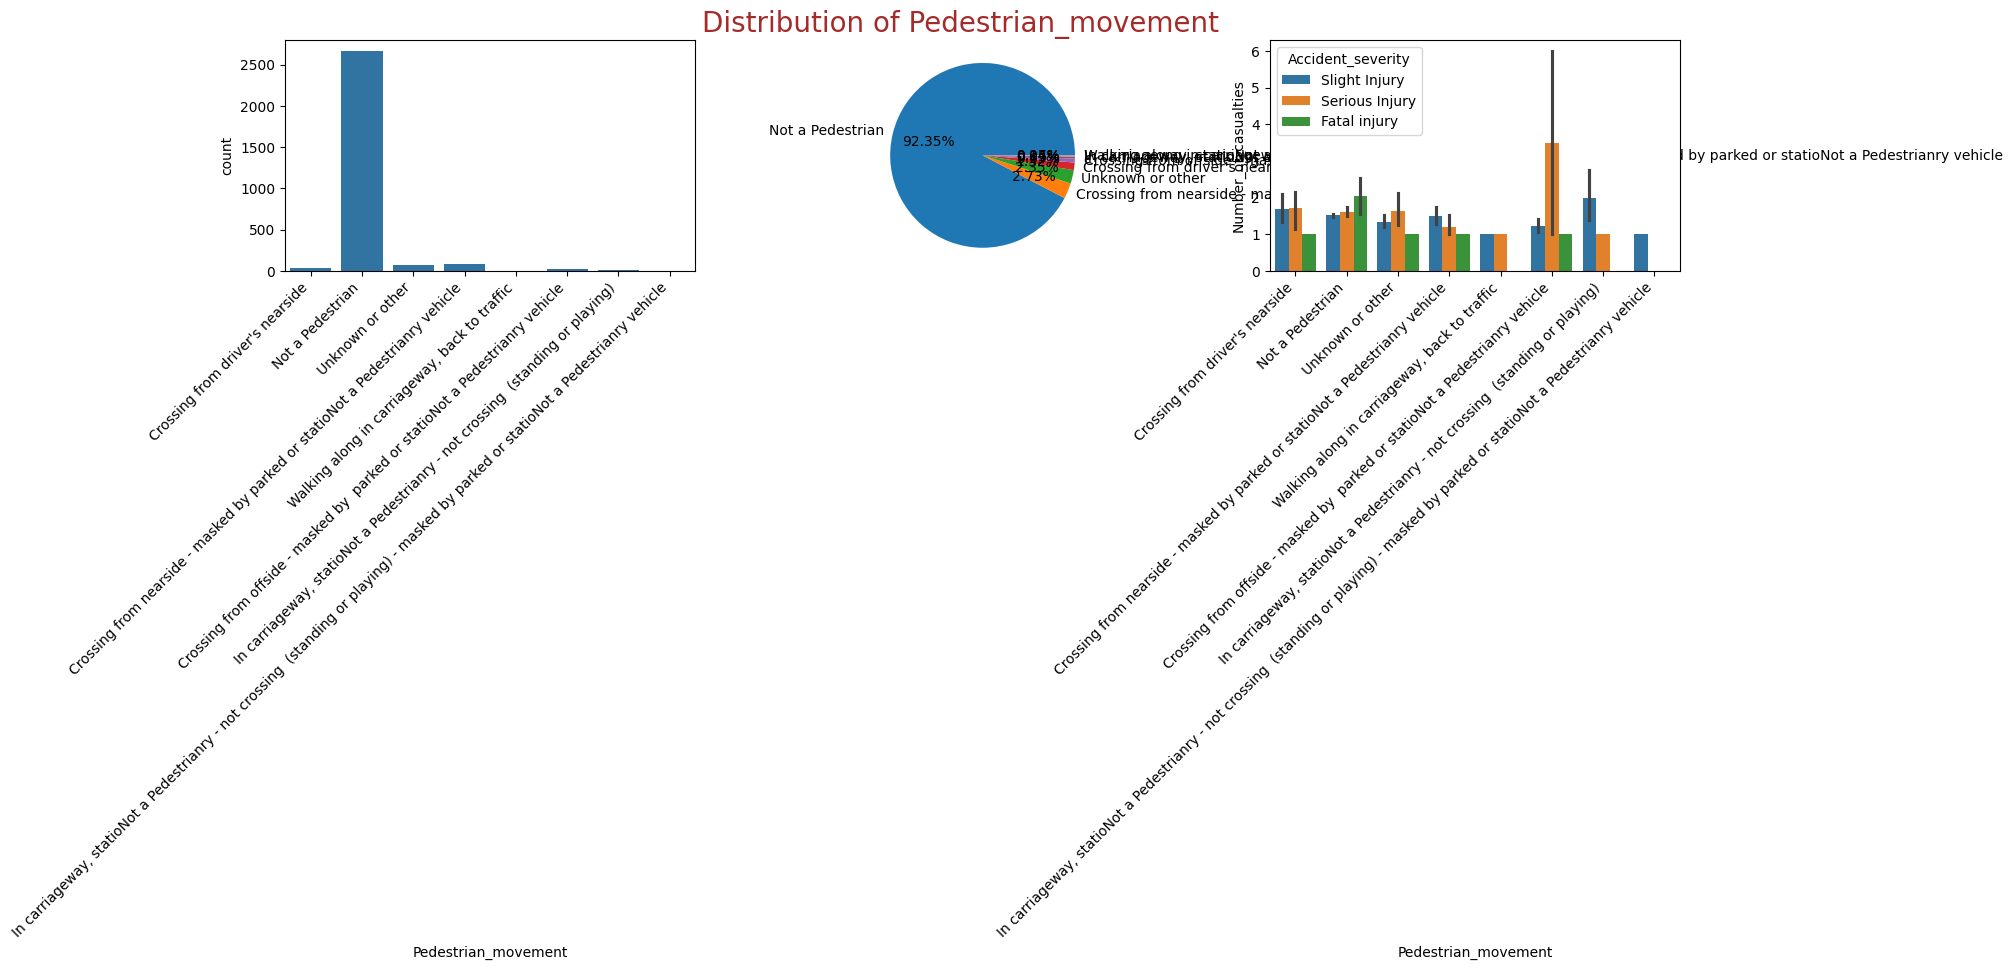

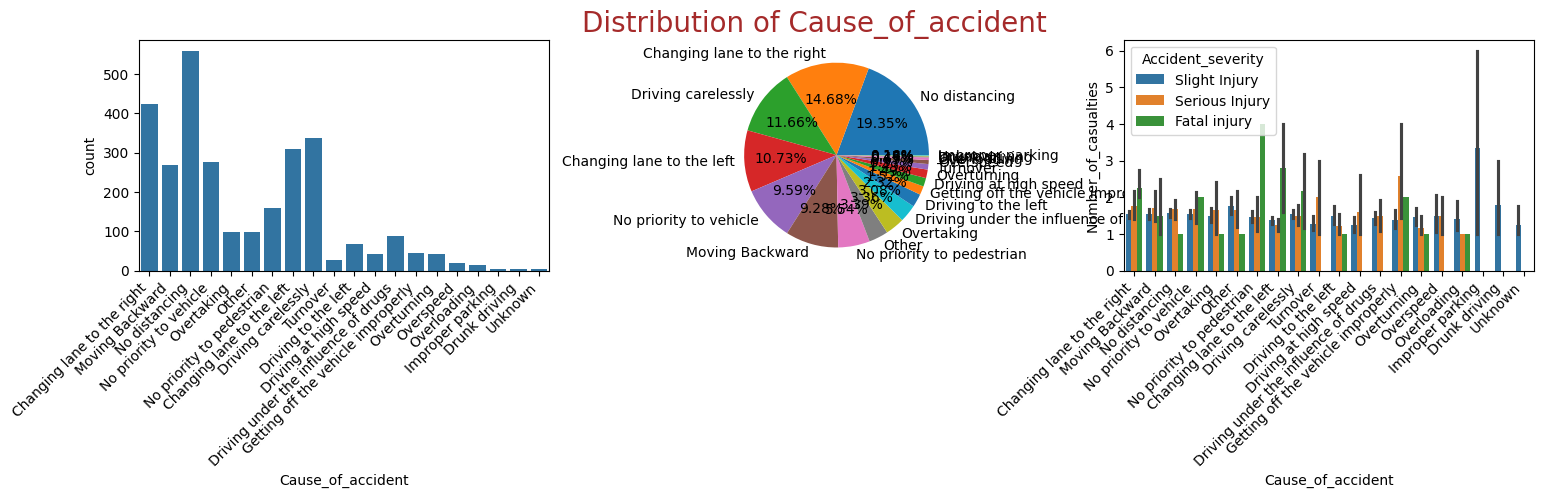

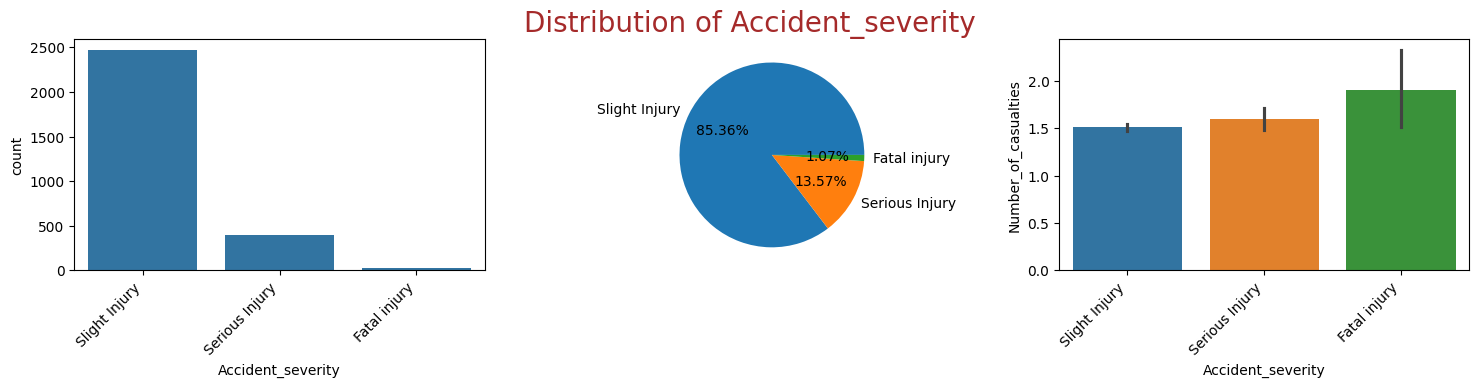

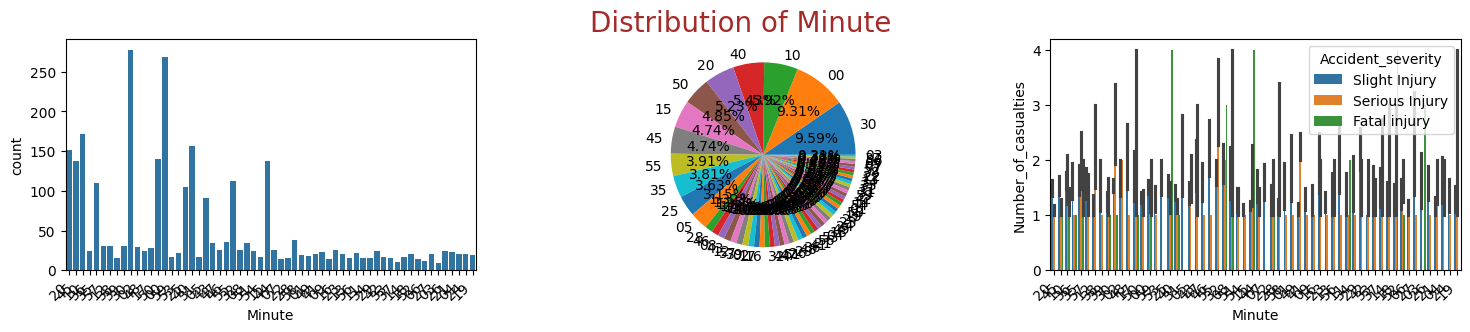

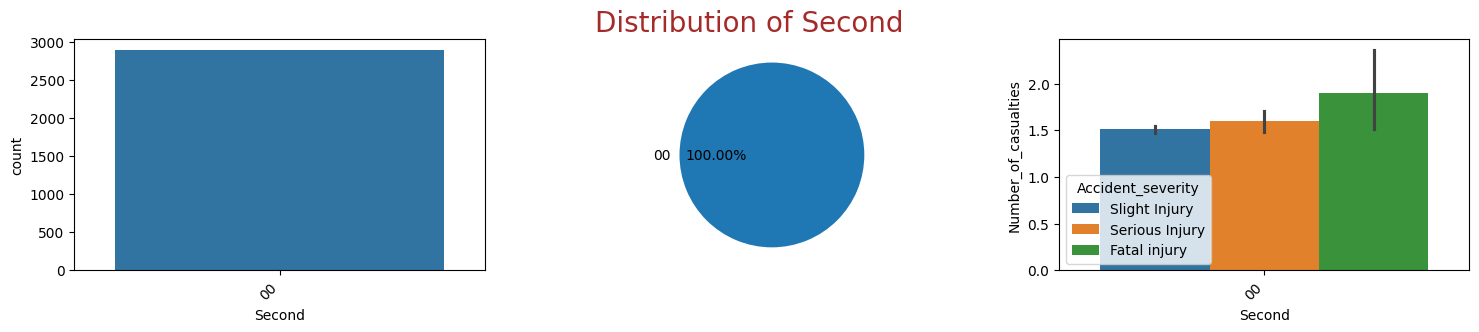

In [47]:
plt.rcParams["figure.figsize"] =(18,3)


for i in cols:
    plt.suptitle(f"Distribution of {i}",size=20, c="brown")
    plt.subplot(1,3,1)
    sns.countplot(data=data, x=data[i])
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,2)
    plt.pie(data[i].value_counts(), labels=data[i].value_counts().index,autopct="%0.2f%%")
    plt.xticks(rotation=45, ha='right')
    plt.subplot(1,3,3)
    sns.barplot(data=data, x=data[i], y="Number_of_casualties",hue="Accident_severity")
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f"{i}_distribution.jpg")
    plt.show()
    
    print()

## Thank you